In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [90]:
df=pd.read_csv('../dataset_encoded.csv')
df.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions
0,0,1,26-50,61k–80k,3,21-40,18.6,60,31,20.0,...,False,False,True,False,False,False,True,True,False,20.000000
1,1,2,26-50,41k–60k,3,41-60,173.0,550,54,91.0,...,False,True,False,False,False,False,True,True,False,91.000000
2,2,3,26-50,41k–60k,7,21-40,116.0,1920,28,151.0,...,False,False,False,True,False,False,True,True,True,34.666667
3,3,4,<=20,21k–40k,5,80+,18.6,200,87,20.0,...,False,False,True,False,False,True,False,True,True,48.333333
4,4,5,<=20,≤20k,3,21-40,18.6,60,27,19.0,...,False,False,True,False,False,False,False,False,False,19.000000


In [ ]:
def compute_trip_cost(row):
    distance = row["travel_distance_exp"]
    cost_per_km = 0
    # Base cost per km by mode
    if row["mode_transportation_Private"]:
        cost_per_km = 11  # average cost per km for car (gotten by 17km/l and fuel 187/l so for 1km = 187/17 = 11)
    elif row["mode_transportation_Taxi"]:
        base = 270
        inc = 55   
    elif row["mode_transportation_Public Transport"]:
        cost_per_km = 2  # average cost per km for public transport
    elif row["mode_transportation_Walking"]:
        cost_per_km = 0 # average cost per km for motorcycle
    else:  #Motorbike
        cost_per_km = 3

    # Distance ranges to approximate km
   

    trip_distance_km = distance
    if  row["mode_transportation_Taxi"] and trip_distance_km > 10:
        trip_cost = base + (inc * (trip_distance_km-10))
    elif row["mode_transportation_Taxi"] and trip_distance_km <= 10:
        trip_cost = base  # minimum fare for taxi
    else: 
        trip_cost = trip_distance_km * cost_per_km

    return trip_cost
df["trip_cost"] = df.apply(compute_trip_cost, axis=1)

In [ ]:
#showing variance in trip cost vs mode of transport
transport=["mode_transportation_Taxi","mode_transportation_Public Transport","mode_transportation_Walking","mode_transportation_Private"]


In [92]:
# here i will be comparing the effect adoption of carpooling has on the economy(trip cost)
base = 270
inc = 55  
def adjusting_tripcost(row):
    distance = row["travel_distance_exp"]
    trip_distance_km = distance

    if row["adoption_yes"] & row["mode_transportation_Taxi"]:
        return row["trip_cost"]/3
    elif row['adoption_yes'] &  row["mode_transportation_Taxi"]==False:
        if distance<10:
            trip_cost = base
            return trip_cost/3
        else:
            trip_cost = base + (inc * (trip_distance_km-10))
            return trip_cost/3
    else: 
        return row["trip_cost"]

df["adjusted_cost"]=df.apply(adjusting_tripcost,axis=1)
        
df.head()


,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions,adjusted_cost
0,0,1,26-50,61k–80k,3,21-40,18.6,62,31,20.0,...,False,True,False,False,False,True,True,False,20.000000,475.000000
1,1,2,26-50,41k–60k,3,41-60,173.0,594,54,91.0,...,True,False,False,False,False,True,True,False,91.000000,896.666667
2,2,3,26-50,41k–60k,7,21-40,116.0,1260,28,151.0,...,False,False,True,False,False,True,True,True,34.666667,420.000000
3,3,4,<=20,21k–40k,5,80+,18.6,174,87,20.0,...,False,True,False,False,True,False,True,True,48.333333,1501.666667
4,4,5,<=20,≤20k,3,21-40,18.6,54,27,19.0,...,False,True,False,False,False,False,False,False,19.000000,401.666667


In [93]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'income', 'trip_frequency',
       'travel_distance', 'g_per_km', 'trip_cost', 'travel_distance_exp',
       'emissions_exp', 'age_exp', 'income_exp', 'gender_Male',
       'reason_comfort', 'reason_safety', 'reason_travel time',
       'reason_trip cost', 'reason_trip distance', 'reason_trip origin',
       'reason_unknown', 'status_Students', 'location_On campus',
       'mode_transportation_Private', 'mode_transportation_Public Transport',
       'mode_transportation_Taxi', 'mode_transportation_Walking',
       'purpose_study', 'purpose_work', 'infrastructure_adequacy_yes',
       'adoption_yes', 'adjusted_emissions', 'adjusted_cost'],
      dtype='object')

In [ ]:
y=df['adjusted_cost']
X=df.drop(columns=['emissions_exp','id','age','income','travel_distance','adjusted_emissions','trip_cost','g_per_km','adjusted_cost','mode_transportation_Walking'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=df["adoption_yes"],
    random_state=42
)

In [95]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
y_pred=lrmodel.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 870.1725852299845
RMSE: 29.49868785607225
MAE: 20.931488915816587
R² Score: 0.9961156466970669


In [97]:
 
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=42)
reg3 = RandomForestRegressor(random_state=42)
#reg4 = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg1),
        ('dt', reg2),
        ('rf', reg3),
        #('svr', reg4)
    ]
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 96.6842737235105
RMSE: 9.83281616443176
MAE: 6.97847365553104
R² Score: 0.9995684121927602


In [98]:
def plot_linear_feature_importance(model, feature_names, top_n=15, figsize=(10, 8)):
    """
    Plot feature importance for Linear Regression as bar chart
    """
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be a fitted linear model")
    
    # Get coefficients
    coefficients = model.coef_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients),
        'coefficient': coefficients
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    colors = ['red' if coef < 0 else 'blue' for coef in importance_df['coefficient']]
    
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Absolute Coefficient Value')
    
    model_type = type(model).__name__
    plt.title(f'{model_type} Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (importance, coef) in enumerate(zip(importance_df['importance'], importance_df['coefficient'])):
        plt.text(importance + 0.01, i, f'{coef:.3f}', va='center', fontsize=10)
    
    # Add legend
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Impact'),
        plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Impact')
    ])
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

In [99]:
def plot_voting_regressor_feature_importance(voting_reg, feature_names, top_n=15, figsize=(12, 8)):
    """
    Plot feature importance for Voting Regressor as bar chart
    """
    if not hasattr(voting_reg, 'named_estimators_'):
        raise ValueError("Model must be a fitted VotingRegressor")
    
    importances = []
    model_names = []
    
    # Collect importances from all models in the ensemble
    for name, model in voting_reg.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
            model_names.append(name)
        elif hasattr(model, 'coef_'):
            coef_importance = np.abs(model.coef_)
            importances.append(coef_importance)
            model_names.append(name)
    
    if not importances:
        raise ValueError("No models with feature importance available")
    
    # Calculate average importance
    avg_importance = np.mean(importances, axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='orange', alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Importance Score')
    plt.title(f'Voting Regressor Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, importance in enumerate(importance_df['importance']):
        plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

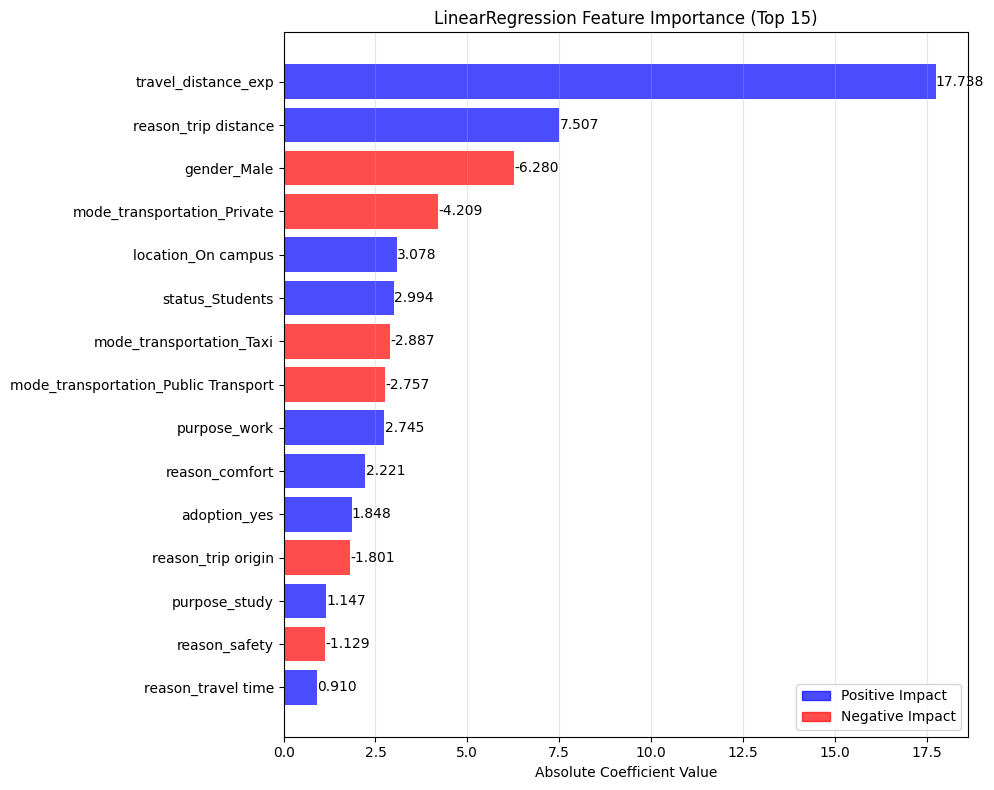

In [100]:
feature_names=X.columns
regressionplot=plot_linear_feature_importance(lrmodel, feature_names)

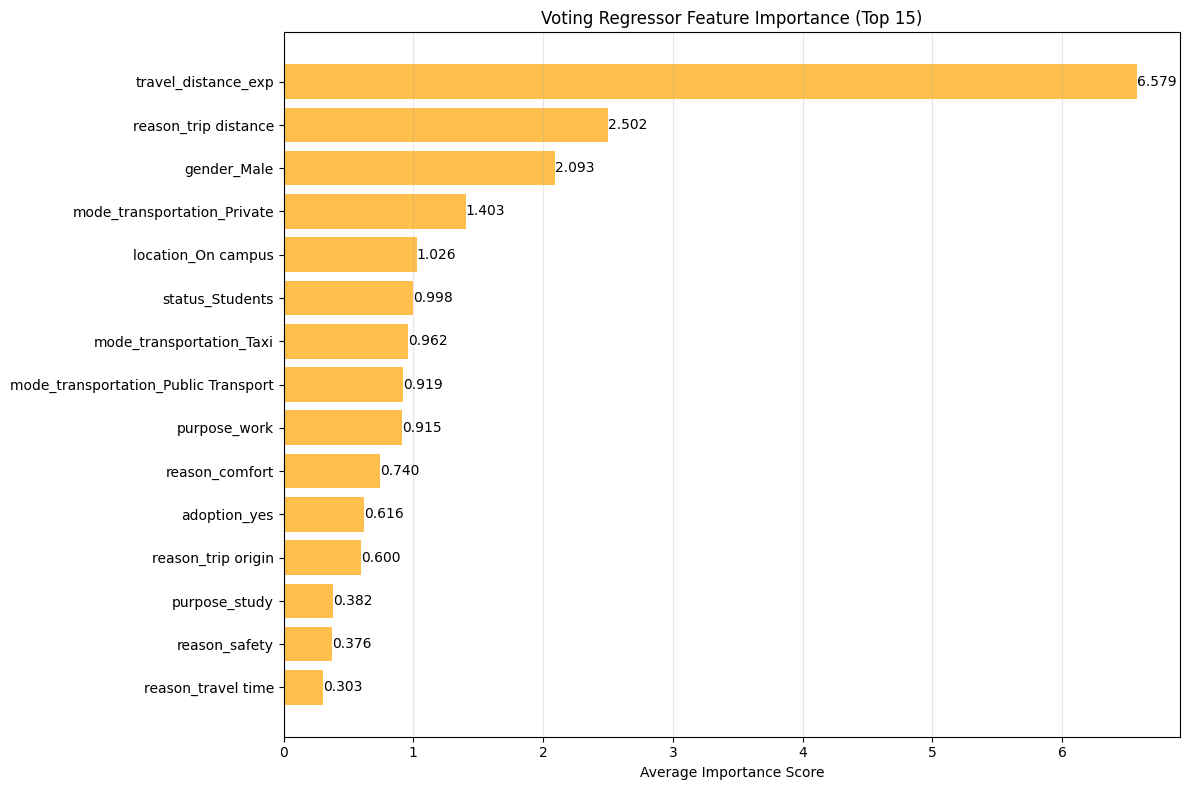

In [101]:
votingplot=plot_voting_regressor_feature_importance(voting_reg,feature_names)

# Summary of Notebook: Carpooling Adoption and Economic Impact Analysis

This notebook explores the impact of carpooling adoption on trip costs using a dataset of 2,000 entries with various transportation modes and demographic features. The analysis leverages feature engineering, regression modeling, and feature importance visualization to draw insights.

## Key Steps and Findings

### 1. Data Preparation & Feature Engineering
- The dataset was loaded and encoded, including variables such as trip frequency, travel distance, age, income, gender, student status, location, transportation mode, trip purpose, infrastructure adequacy, and carpooling adoption.
- Trip cost was calculated based on transportation mode and distance, with special handling for taxi fares.
- An adjusted trip cost was computed to simulate the effect of carpooling (e.g., dividing taxi costs by three for carpooling scenarios).

### 2. Regression Modeling
- **Linear Regression** and **Voting Regressor** (ensemble of Linear Regression, Decision Tree, and Random Forest) were trained to predict adjusted trip costs.
- The models achieved high accuracy, with R² scores close to 1, indicating excellent fit.

### 3. Feature Importance Analysis
- **Linear Regression** revealed that `travel_distance_exp`, `status_Students`, and `mode_transportation_Private` are the most influential features affecting trip cost.
- **Voting Regressor** confirmed similar findings, with `travel_distance_exp` and `status_Students` consistently ranking highest.

### 4. Economic Impact of Carpooling
- The simulation showed that carpooling significantly reduces trip costs, especially for taxi users.
- The analysis highlights that trip distance and student status are major drivers of cost, suggesting targeted policies could maximize economic benefits.

## Conclusion

Carpooling adoption leads to substantial economic savings, particularly for longer taxi trips. The most important factors influencing trip cost are travel distance, student status, and choice of private transportation. These insights can inform transportation policy and carpooling promotion strategies to optimize economic outcomes for commuters.